# Unsupervised Learning

![image.png](https://miro.medium.com/max/1000/0*qJ3y2frzPU8hbt9L.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Reduction of Dimensionality
### Principal Component Analysis

In [2]:
x1 = np.linspace(0,1.5,15)
y1 = .25*x1 + 2 + np.random.normal(0,.2,len(x1))
x2 = np.linspace(3,5,15)
y2 = .25*x2 + 2 + np.random.normal(0,.2,len(x1))
data = pd.DataFrame({"x":np.concatenate([x1,x2]),"y":np.concatenate([y1,y2]),"label":["red"]*15+["blue"]*15})
data.head()

,x,y,label
0,0.000000,1.820992,red
1,0.107143,2.186078,red
2,0.214286,1.947922,red
3,0.321429,1.928353,red
4,0.428571,2.198406,red


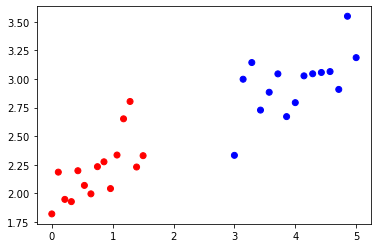

In [3]:
plt.scatter(data["x"],data["y"],c=data["label"]);

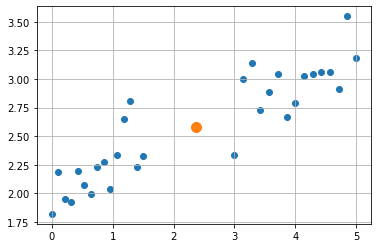

In [4]:
# Find center of all points
plt.grid()
cx,cy = data["x"].mean(),data["y"].mean()
plt.scatter(data["x"],data["y"])
plt.scatter(cx,cy,s=100);

In [5]:
cx,cy

(2.375, 2.5827770508532613)

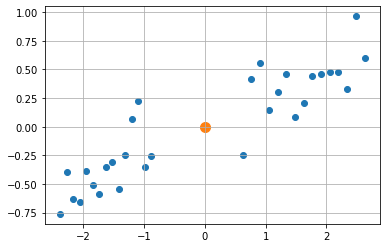

In [6]:
# Center data in origin
plt.grid()
plt.scatter(data["x"]-cx,data["y"]-cy)
plt.scatter(0,0,s=100);

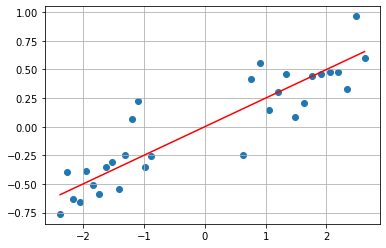

In [7]:
# Find line that best fits data (PC1)
plt.grid()
plt.scatter(data["x"]-cx,data["y"]-cy)
x = np.linspace((data["x"]-cx).min(),(data["x"]-cx).max())
y = .25*x
plt.plot(x,y, c="red");

$y = mx + b$

An orthogonal line will have a slope m2 described by:

$m2 = -1/m$

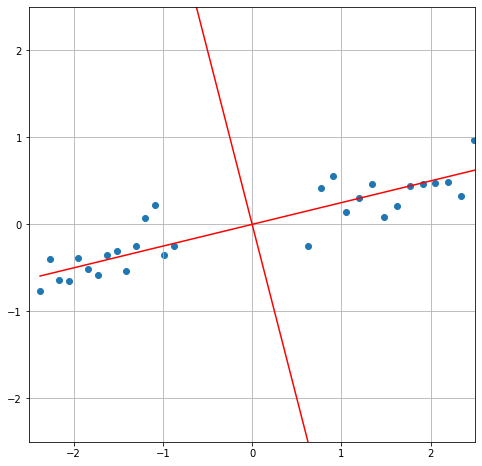

In [8]:
# Find ortogonal line to PC1 (PC2)
plt.figure(figsize=(8,8))
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.scatter(data["x"]-cx,data["y"]-cy)
x = np.linspace((data["x"]-cx).min(),(data["x"]-cx).max())
y = .25*x
plt.plot(x,y, c="red")
x = np.linspace(-2,2,2)
y = -4*x
plt.plot(x,y, c="red")
plt.grid()

In [15]:
pca = PCA(2)
data_t = pca.fit_transform(data[["x","y"]])

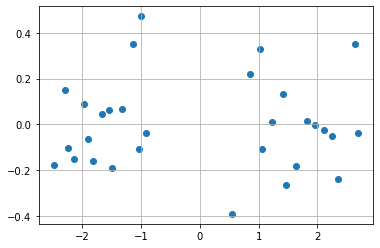

In [16]:
plt.grid()
plt.scatter(data_t[:,0],data_t[:,1]);

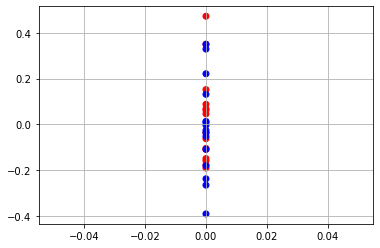

In [21]:
plt.grid()
plt.scatter([0]*data.shape[0],data_t[:,1],c=data["label"]);

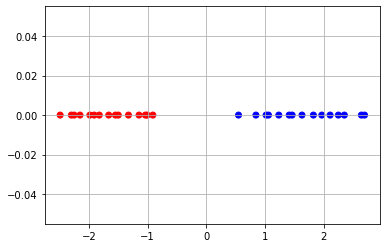

In [23]:
plt.grid()
plt.scatter(data_t[:,0],[0]*data.shape[0],c=data["label"]);

In [17]:
pca.explained_variance_ratio_

array([0.98775476, 0.01224524])

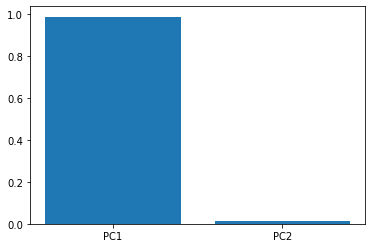

In [18]:
plt.bar([1,2],pca.explained_variance_ratio_,tick_label=["PC1","PC2"]);

- The number of (max) Principal Components is equal to the number of variables or the number of data points, whichever is lower.
- Each PC explains part of the variance of the original data
- Always standardize data before PCA. (mean=0, std=1)

In [13]:
# You can't have more PC's than the number of features or samples, whichever is the lowest
# pca = PCA(3)
# data_t = pca.fit_transform(data[["x","y"]])

### More dimensions

In [24]:
from sklearn.datasets import load_iris

In [25]:
X,y = load_iris(return_X_y=True)
cols = load_iris()["feature_names"]
labels = load_iris()["target_names"]

In [26]:
data = pd.DataFrame(X,columns=cols)
data["species"] = [labels[i] for i in y]

In [27]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
pca = PCA(4)
data_t = pca.fit_transform(data.iloc[:,:-1])

In [29]:
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

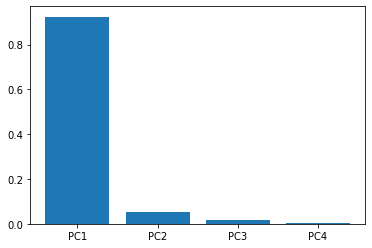

In [30]:
plt.bar(range(4),var_ratio,tick_label=[f"PC{i+1}" for i in range(len(var_ratio))]);

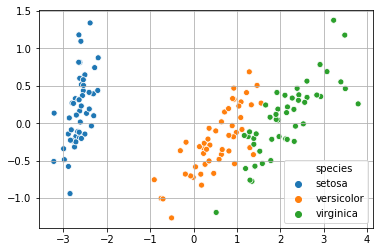

In [31]:
import seaborn as sns
plt.grid()
sns.scatterplot(data_t[:,0],data_t[:,1], hue=data["species"]);

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [34]:
stages = [StandardScaler(),PCA(4)]
pipe = make_pipeline(*stages)

In [36]:
data_t = pipe.fit_transform(X)

In [40]:
var_ratio = pipe.named_steps["pca"].explained_variance_ratio_

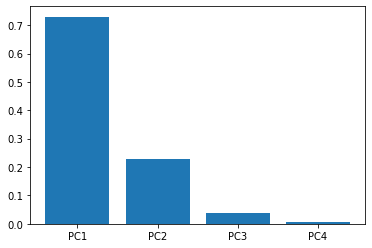

In [41]:
plt.bar(range(4),var_ratio,tick_label=[f"PC{i+1}" for i in range(len(var_ratio))]);

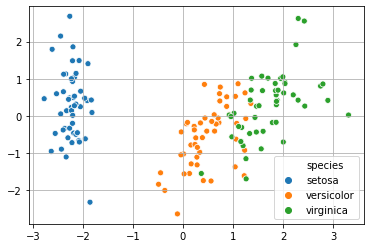

In [42]:
plt.grid()
sns.scatterplot(data_t[:,0],data_t[:,1], hue=data["species"]);

In [43]:
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

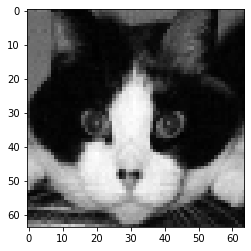

In [46]:
plt.imshow(cats[:,50].reshape(64,64).T, cmap="gray")

In [45]:
len(cats)

4096

In [72]:
from sklearn.base import TransformerMixin

class Normalizer(TransformerMixin):
    def fit(self, data):
        self.maxi = np.max(data,axis=0)
        return self
    def transform(self,data):
        return data/self.maxi

In [73]:
Normalizer().transform

<bound method Normalizer.transform of <__main__.Normalizer object at 0x139450f70>>

In [74]:
pipeline = make_pipeline(Normalizer(),PCA(50))

In [96]:
data = np.concatenate([dogs,cats],axis=1).T
y = ["dogs"]*80 + ["cats"]*80

In [77]:
data_t = pipeline.fit_transform(data)

In [81]:
var_ratio = pipeline.named_steps["pca"].explained_variance_ratio_

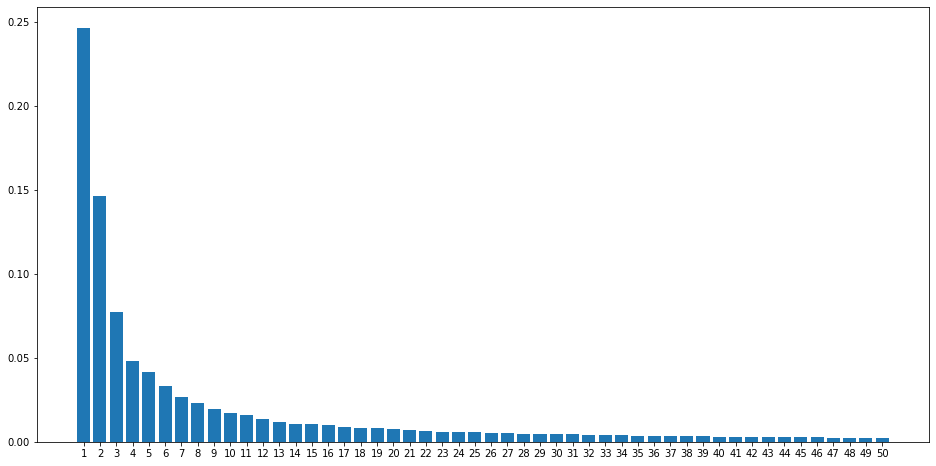

In [87]:
plt.figure(figsize=(16,8))
plt.bar(range(len(var_ratio)),var_ratio,tick_label=range(1,len(var_ratio)+1));

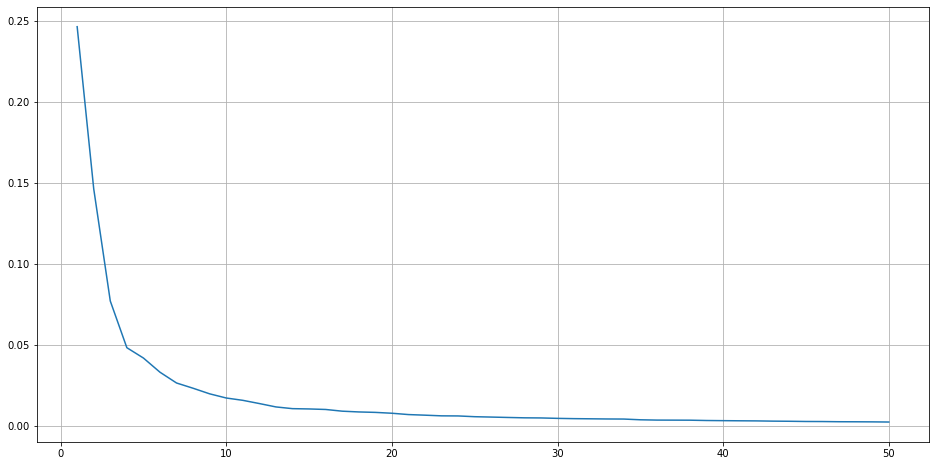

In [94]:
# Scree Plot

plt.figure(figsize=(16,8))
plt.grid()
plt.plot(range(1,len(var_ratio)+1),var_ratio)
plt.xticks=range(1,len(var_ratio)+1);

In [156]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [187]:
X_train,X_test,y_train,y_test = train_test_split(data,y)

In [188]:
pipeline = make_pipeline(Normalizer(),PCA(50))

In [193]:
# Prepare train data
X_train_t = pipeline.fit_transform(X_train)

In [194]:
# Train Model
knn = KNeighborsClassifier()
knn.fit(X_train_t[:,:2],y_train)

KNeighborsClassifier()

In [195]:
# Confusion Matrix
X_test_t = pipeline.transform(X_test)
y_pred = knn.predict(X_test_t[:,:2])
confusion_matrix(y_test,y_pred)

array([[11,  6],
       [ 6, 17]])

In [196]:
f1_score([1 if i=="dogs" else 0 for i in y_test],[1 if i=="dogs" else 0 for i in y_pred])

0.7391304347826085

In [202]:
knn = KNeighborsClassifier()
X_train_t = pipeline.fit_transform(X_train)
knn.fit(X_train_t[:,:20],y_train)
X_test_t = pipeline.transform(X_test)
y_pred = knn.predict(X_test_t[:,:20])
confusion_matrix(y_test,y_pred)

array([[17,  0],
       [ 7, 16]])

In [203]:
f1_score([1 if i=="dogs" else 0 for i in y_test],[1 if i=="dogs" else 0 for i in y_pred])

0.8205128205128205

In [204]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  1],
       [ 6, 17]])

In [201]:
f1_score([1 if i=="dogs" else 0 for i in y_test],[1 if i=="dogs" else 0 for i in y_pred])

0.8292682926829269

### t-SNE
##### t-distributed stochastic neighbor embedding 

In [207]:
X,y = load_iris(return_X_y=True)
cols = load_iris()["feature_names"]
labels = load_iris()["target_names"]
data = pd.DataFrame(X,columns=cols)
data["species"] = [labels[i] for i in y]

In [246]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)

In [247]:
data_t = tsne.fit_transform(data.iloc[:,:-1])

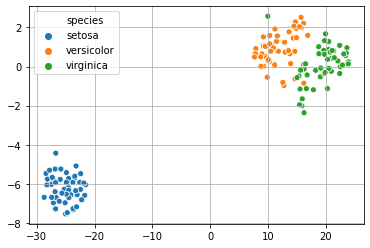

In [248]:
plt.grid()
sns.scatterplot(data_t[:,0],data_t[:,1], hue=data["species"]);

## Clustering

In [273]:
from sklearn.cluster import KMeans

In [274]:
km = KMeans(n_clusters=3)

In [275]:
km.fit(X)

KMeans(n_clusters=3)

In [276]:
y_pred = km.predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [277]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [278]:
pd.crosstab(y,y_pred)

col_0,0,1,2
row_0,,,
0,0,0,50
1,48,2,0
2,14,36,0


In [280]:
models = [KMeans(i) for i in range(1,11)]
scores = [m.fit(X).score(X) for m in models]

In [285]:
scores

[-681.3705999999995,
 -152.347951760358,
 -78.85144142614602,
 -57.228473214285714,
 -46.44618205128204,
 -39.039987246087236,
 -34.75674963924965,
 -30.325840767927723,
 -27.909224310776953,
 -26.319290100250644]

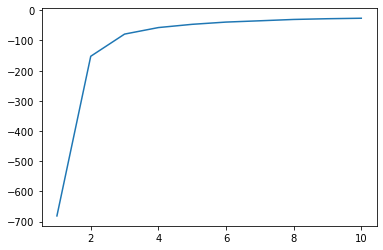

In [286]:
plt.plot(range(1,11),scores)

### DBSCAN

In [287]:
from sklearn.cluster import DBSCAN

In [311]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [312]:
dbscan.fit(X)

DBSCAN()

In [313]:
y_pred = dbscan.labels_
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [314]:
pd.crosstab(y,y_pred)

col_0,-1,0,1
row_0,,,
0,1,49,0
1,6,0,44
2,10,0,40


In [315]:
pca = PCA(2)
X_t = pca.fit_transform(X)

<AxesSubplot:>

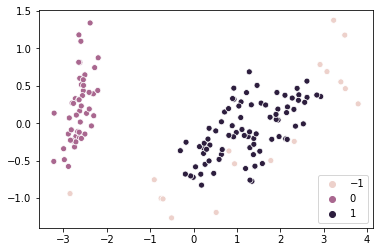

In [318]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=y_pred)

In [319]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_t)

DBSCAN()

<AxesSubplot:>

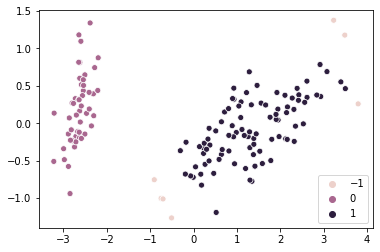

In [320]:
y_pred = dbscan.labels_
sns.scatterplot(X_t[:,0],X_t[:,1], hue=y_pred)

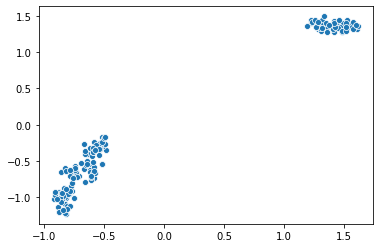

In [341]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1500, learning_rate=200)
data_t = tsne.fit_transform(data.iloc[:,:-1])
data_t = StandardScaler().fit_transform(data_t)
sns.scatterplot(data_t[:,0],data_t[:,1]);

In [361]:
dbscan = DBSCAN(eps=0.2, min_samples=30)
dbscan.fit(data_t)

DBSCAN(eps=0.2, min_samples=30)

<AxesSubplot:>

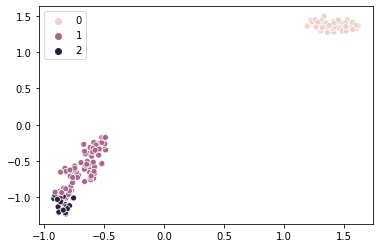

In [362]:
y_pred = dbscan.labels_
sns.scatterplot(data_t[:,0],data_t[:,1], hue=y_pred)

### Must See videos
#### PCA
- [StatQuest PCA](https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer)
#### t-SNE
- [StatQuest t-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM&feature=youtu.be&ab_channel=StatQuestwithJoshStarmer)
#### KMeans
- [StatQuest KMeans](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer)

StatQuest 😍

#### DBSCAN
- [DBSCAN](https://www.youtube.com/watch?v=sJQHz97sCZ0&ab_channel=CognitiveClass)